## About Dataset ##

### Context ###

The data is already presented in https://www.kaggle.com/ronitf/heart-disease-uci but there are some descriptions and values that are wrong as discussed in https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877. So, here is re-processed dataset that was cross-checked with the original data https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

### Content ### 

There are 13 attributes

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type

-- Value 0: typical angina

-- Value 1: atypical angina

-- Value 2: non-anginal pain

-- Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

condition: 0 = no disease, 1 = disease

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("../data/raw/heart_cleveland_upload.csv")

In [3]:
print(raw_data.shape)
raw_data.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
raw_data.duplicated().sum()

0

In [6]:
raw_data.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

### Numeric features

In [7]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'oldpeak'}>, <AxesSubplot: >]],
      dtype=object)

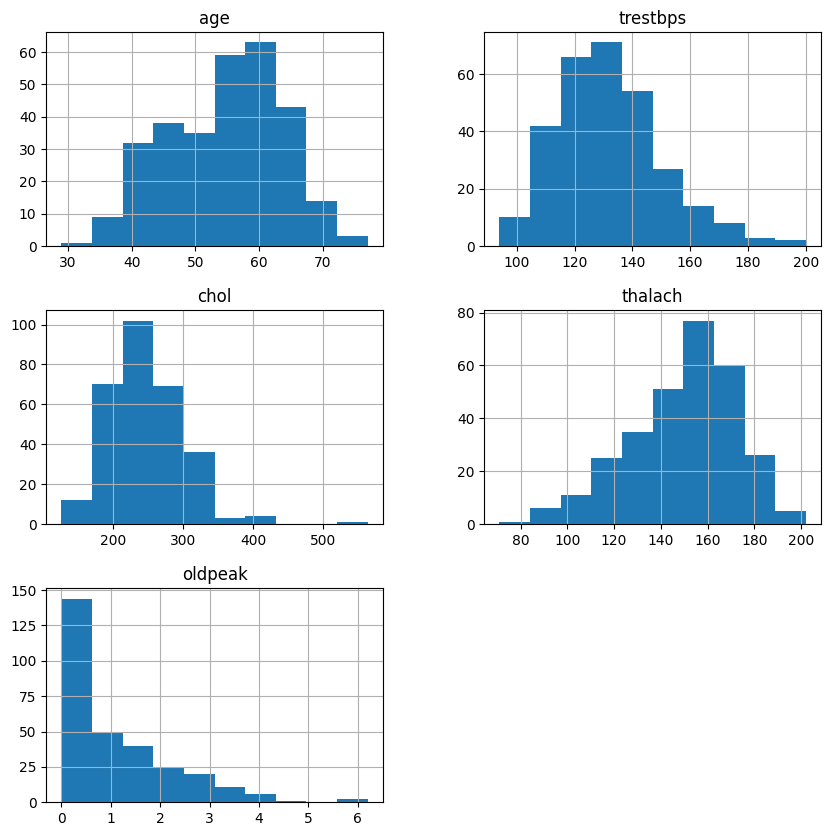

In [8]:
num = raw_data[numeric_features]
num.hist(figsize = (10, 10))

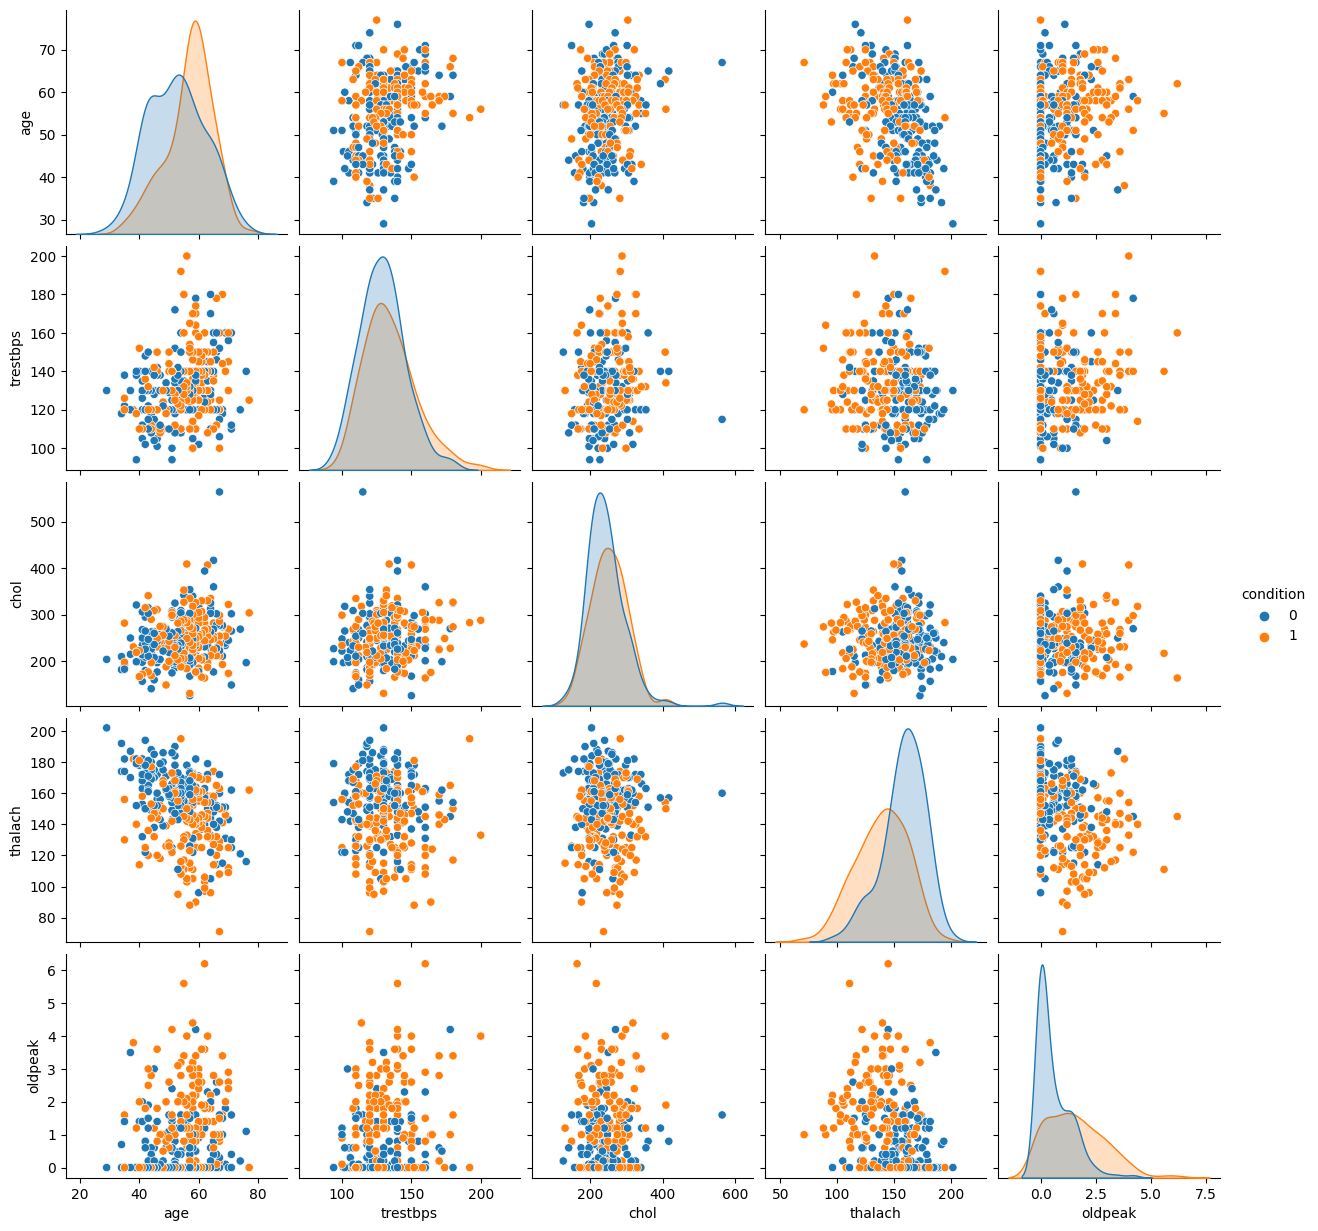

In [9]:
sns.pairplot(raw_data[numeric_features + ['condition']], hue='condition')

<AxesSubplot: >

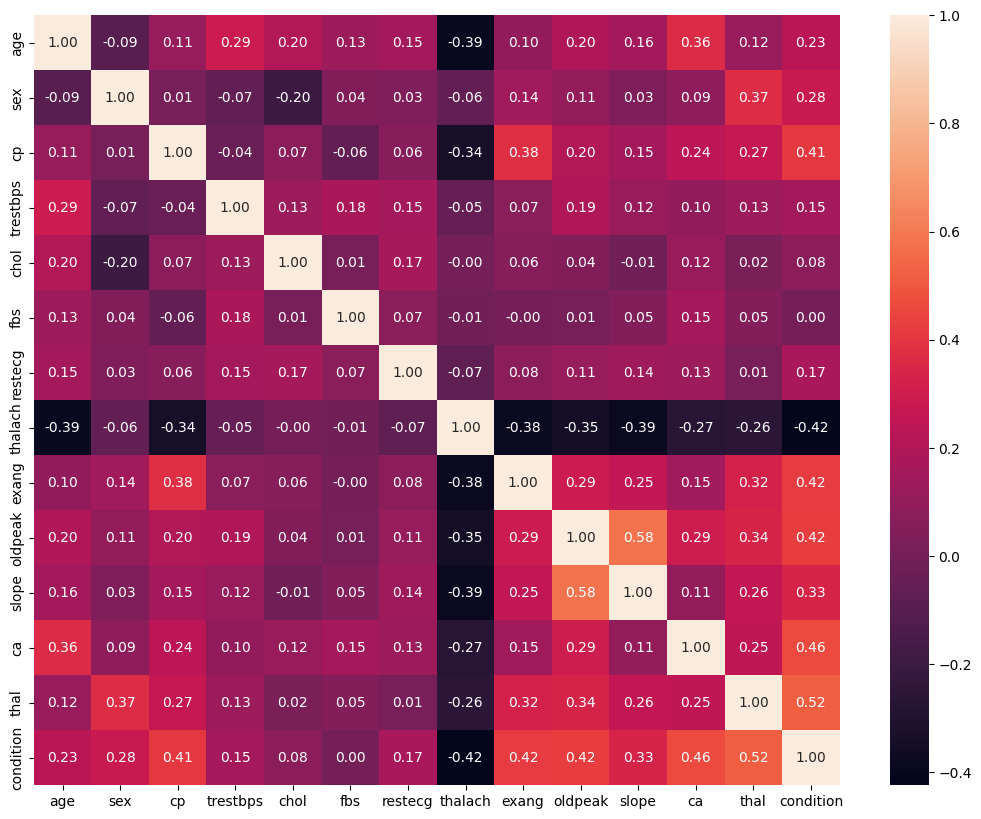

In [10]:
plt.figure(figsize = (13, 10))
sns.heatmap(raw_data.corr(), annot=True, fmt='.2f')

### Categorial features

In [11]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal']

array([[<AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'fbs'}>],
       [<AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

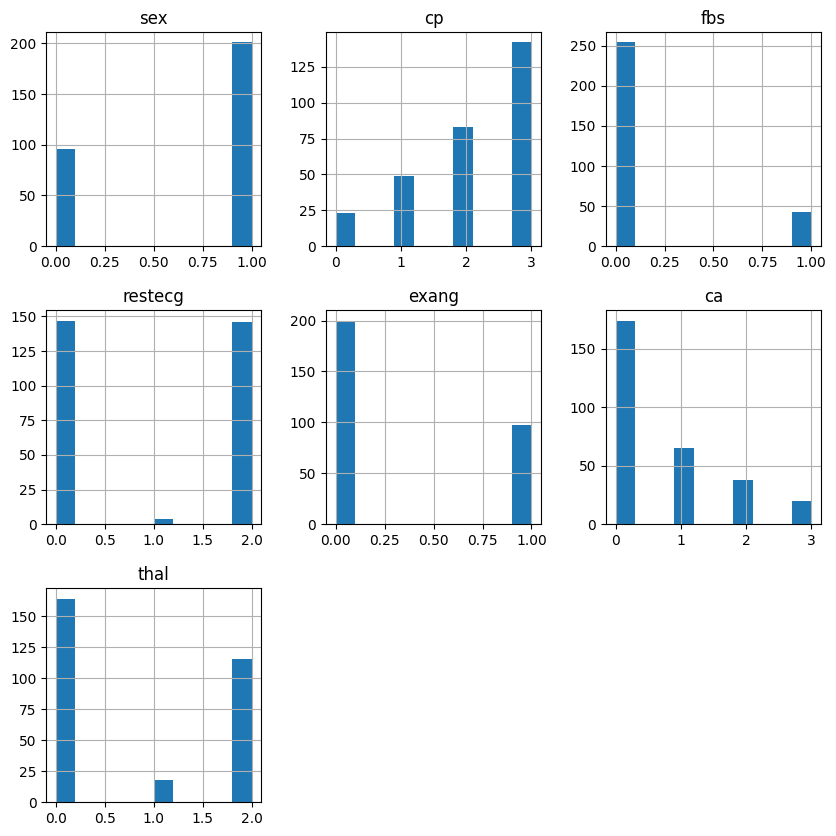

In [12]:
cat = raw_data[categorical_features]
cat.hist(figsize = (10, 10))